In [239]:
#import relevant libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

#import machine learning models

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier


#model selections
from sklearn.model_selection import train_test_split,RandomizedSearchCV

#evaluation metrics
from sklearn.metrics import confusion_matrix,recall_score,f1_score,precision_score,roc_curve

In [240]:
#my_path = 'C:/Users/user/Documents'

In [241]:
#df = pd.read_csv(os.path.join(my_path,'Churn_Modelling.csv'))
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [243]:
#checking to see if there are missing values present
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [244]:
#displaying the categorical columns
for c in df.columns:
    if df[c].dtype == 'object':
        print(c)

Surname
Geography
Gender


In [245]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [246]:
#storing the categorical columns in a list
cat_columns = []
for c in df.columns:
    if df[c].dtype == 'object':
        cat_columns.append(c)
        #print(f'{df[c]}: {df[c].unique()}')

In [247]:
cat_columns

['Surname', 'Geography', 'Gender']

In [248]:
#cgecking the descriptive statistics of the data
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##### There are two columns in the dataset that do not seem to add much to the dataset, CustomerId and RowNumber
* The two columns will be dropped

In [249]:
df.drop(['RowNumber','CustomerId'],
       axis = 1,
       inplace = True)

In [250]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### Exploratory Data Analysis

C:\Users\OLU-JUNAID & CO\AppData\Local\Temp\ipykernel_10352\2160652115.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.EstimatedSalary)


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

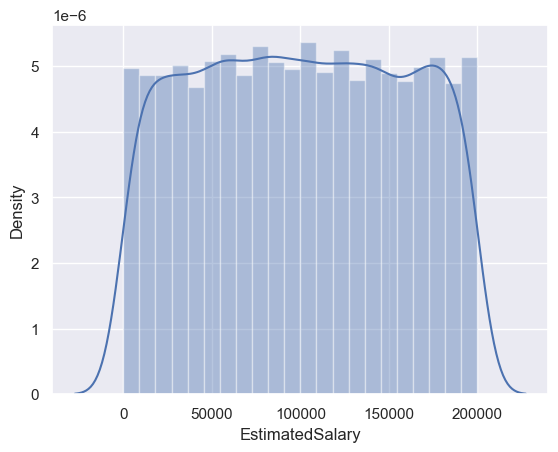

In [251]:
sns.distplot(df.EstimatedSalary)

<Axes: >

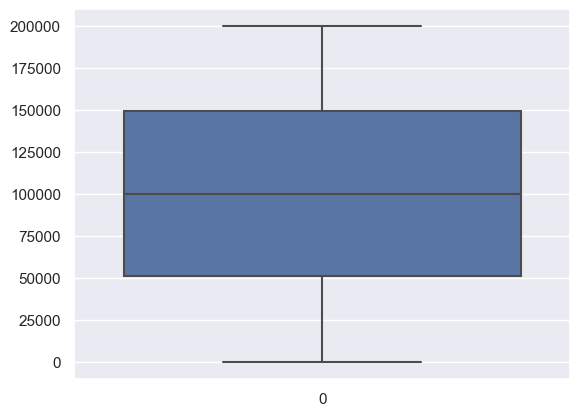

In [252]:
sns.boxplot(df.EstimatedSalary)

In [253]:
df.HasCrCard.value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

* More customers have credit cards

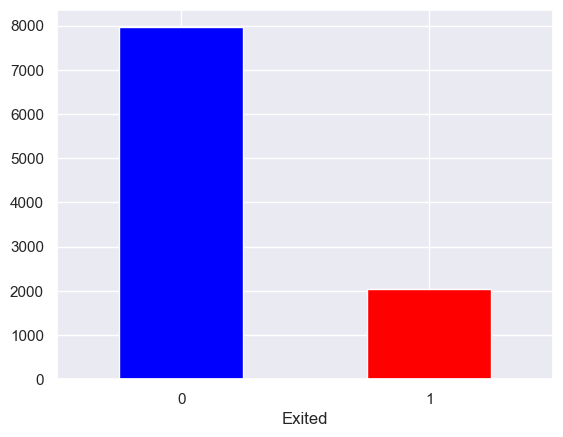

In [254]:
df.Exited.value_counts().plot(kind = 'bar',color = ['blue','red'])
plt.xticks(rotation = 0);

* Blue represents the customers that didn't exit , while red reps the customers that exited
* This is an imbalanced dataset

In [255]:
df.Exited[df.HasCrCard==1].value_counts()

Exited
0    5631
1    1424
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

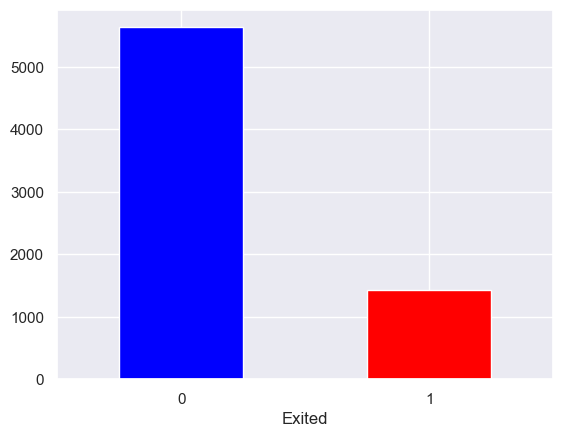

In [256]:
df.Exited[df.HasCrCard==1].value_counts().plot(kind = 'bar',color = ['blue','red'])
plt.xticks(rotation = 0)

* From the bar chart above,i deduced that a customer that has credit card is more likely to stay than exit

In [257]:
df.Exited[df.HasCrCard==0].value_counts()

Exited
0    2332
1     613
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

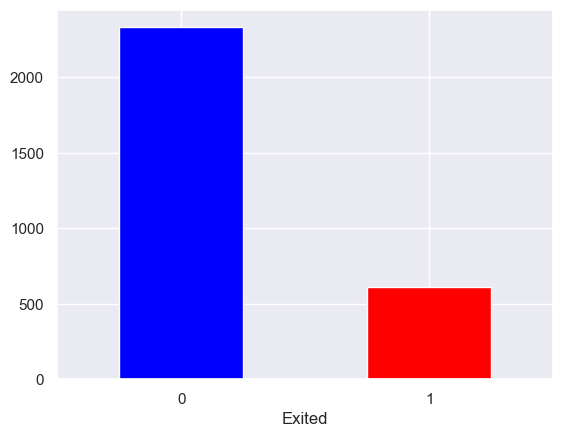

In [258]:
df.Exited[df.HasCrCard==0].value_counts().plot(kind = 'bar',color = ['blue','red'])
plt.xticks(rotation = 0)

In [259]:
613/(613+2332)

0.20814940577249574

In [260]:
1424/(5631+1424)

0.20184266477675408

* The probability of a person staying when they either have a credit card or not is almost the same

In [261]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

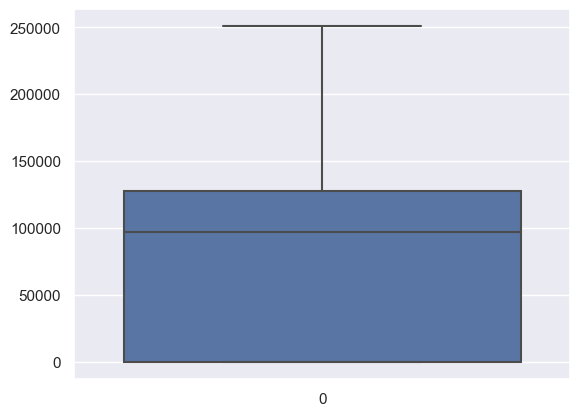

In [262]:
sns.boxplot(df.Balance)

In [263]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

* 3 main countries are represented in the dataset

In [264]:
df.Geography[df.Exited==1].value_counts()

Geography
Germany    814
France     810
Spain      413
Name: count, dtype: int64

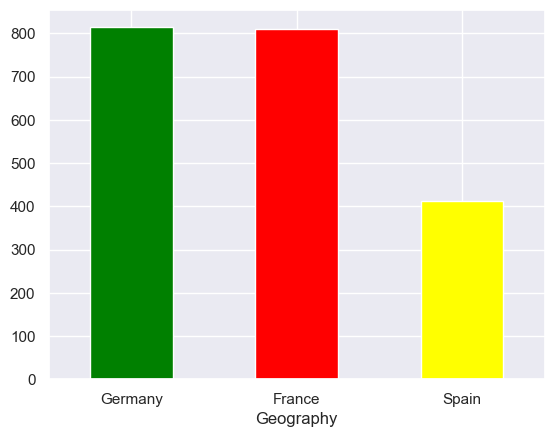

In [265]:
df.Geography[df.Exited==1].value_counts().plot.bar(color = ['green','red','yellow']);
plt.xticks(rotation = 0);

* When comparing the countries under the condition of a customer exiting,Germans are more likely to exit

In [266]:
df.Geography[df.Exited==0].value_counts()

Geography
France     4204
Spain      2064
Germany    1695
Name: count, dtype: int64

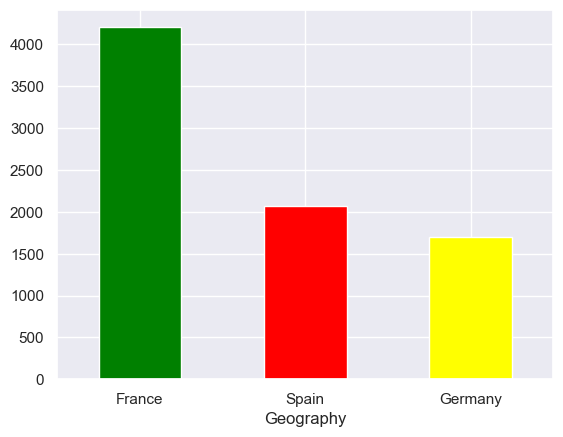

In [267]:
df.Geography[df.Exited==0].value_counts().plot.bar(color = ['green','red','yellow']);
plt.xticks(rotation = 0);

* When comparing the countries under the condition of a customer not exiting,Germans are more less likely to stay and the French are most likely to stay

In [268]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

<Axes: xlabel='Gender'>

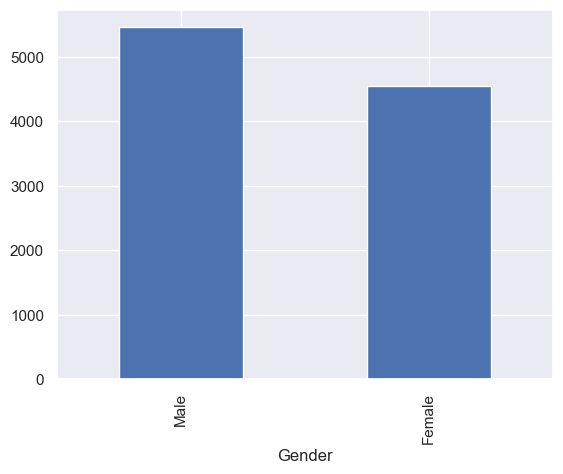

In [269]:
df.Gender.value_counts().plot.bar()

* There are more male customers in the dataset 

In [270]:
df.Gender[df.Exited==1].value_counts()

Gender
Female    1139
Male       898
Name: count, dtype: int64

* Of all those that exited, the number of females exceeded that of males(Proving once again that women will leave you)

In [271]:
df.Gender[df.Exited==0].value_counts()

Gender
Male      4559
Female    3404
Name: count, dtype: int64

* More males stayed

#### Age vs Estimated salary

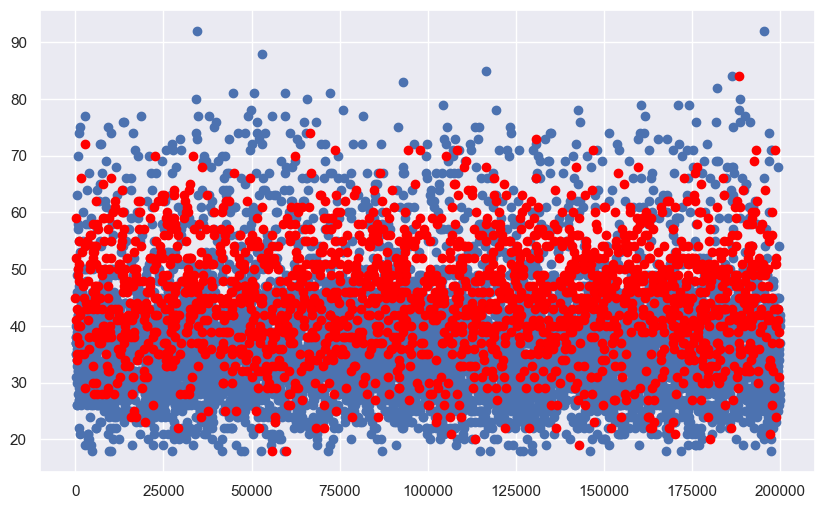

In [272]:
plt.figure(figsize =(10,6))
plt.scatter(df.EstimatedSalary[df.Exited==0],df.Age[df.Exited==0])
plt.scatter(df.EstimatedSalary[df.Exited==1],df.Age[df.Exited==1],c='red')

* There aren't many visible trends in the scatter plot

#### Balance vs Estimated salary

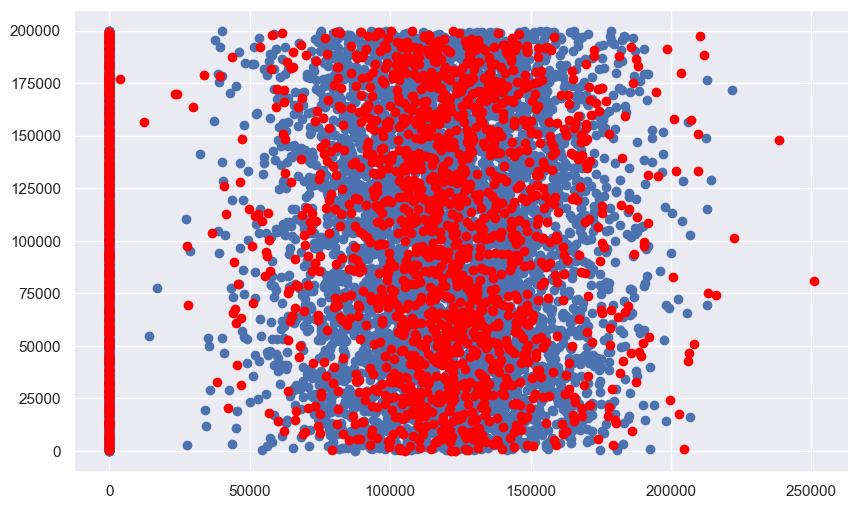

In [273]:
plt.figure(figsize=(10,6))
plt.scatter(df.Balance[df.Exited==0],df.EstimatedSalary[df.Exited==0])
plt.scatter(df.Balance[df.Exited==1],df.EstimatedSalary[df.Exited==1],c='red')


* There aren't many visible trends in the scatter plot

C:\Users\OLU-JUNAID & CO\AppData\Local\Temp\ipykernel_10352\4062876804.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.CreditScore)


<Axes: xlabel='CreditScore', ylabel='Density'>

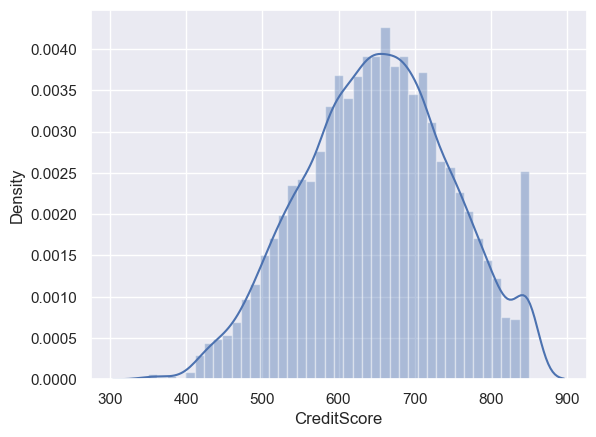

In [274]:
sns.distplot(df.CreditScore)

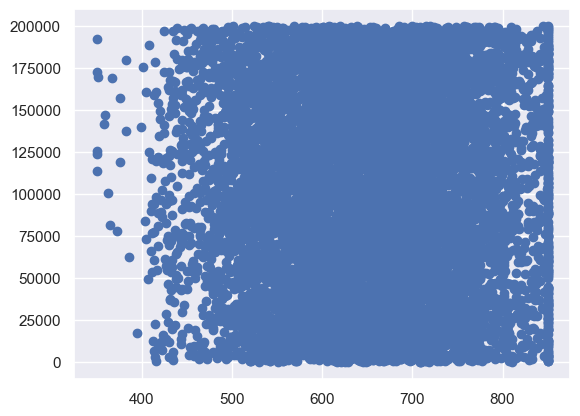

In [275]:
plt.scatter(df.CreditScore,df.EstimatedSalary)

#### Feature engineering

In [279]:
df['salary_per_credit'] = df.EstimatedSalary/df.CreditScore
df['salary_per_age'] = df.EstimatedSalary/df.Age
df['salary_per_products'] = df.EstimatedSalary/df.NumOfProducts
df['credit_per_age'] = df.CreditScore/df.Age
df['products_per_age'] = df.NumOfProducts/df.Age
df['credit_per_product']= df.CreditScore/df.NumOfProducts
df['Balance_per_age'] = df.Balance/df.Age
df['balance_and_age'] = df.Balance*df.Age
df['salary_and_age'] = df.EstimatedSalary*df.Age
df['credit_and_age'] = df.CreditScore*df.Age
df['salary_and_products'] = df.EstimatedSalary*df.NumOfProducts

In [280]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,salary_per_credit,salary_per_age,salary_per_products,credit_per_age,products_per_age,credit_per_product,Balance_per_age,balance_and_age,salary_and_age,credit_and_age,salary_and_products
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,157.577626,2751.423520,74715.158001,17.874340,0.042145,486.417308,2087.543881,2.995492e+06,3.891349e+06,25315.733100,153633.185332
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,95.077457,1786.664851,52058.899406,5.376363,0.019472,183.636877,1844.914722,2.646813e+06,2.530422e+06,7868.836264,111644.487396
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.016333,0.257333,11.580000,4.857143,0.010870,94.000000,0.000000,0.000000e+00,5.211000e+02,8968.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,78.060414,1315.889646,32589.780000,14.088889,0.026316,323.000000,0.000000,0.000000e+00,1.872521e+06,19908.000000,67998.187500
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,154.484366,2535.833404,65908.002500,17.285714,0.037037,443.000000,2315.579783,3.360211e+06,3.659220e+06,24177.000000,132555.345000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,229.872646,3979.231707,100943.797500,20.961538,0.055556,653.000000,3450.945280,4.911035e+06,5.543942e+06,29295.000000,203884.897500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,548.495686,10962.340556,199970.740000,46.888889,0.142857,850.000000,10211.151500,1.379695e+07,1.799189e+07,69276.000000,795498.080000


In [281]:
df1 = df.copy()

In [282]:
df1

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,salary_per_age,salary_per_products,credit_per_age,products_per_age,credit_per_product,Balance_per_age,balance_and_age,salary_and_age,credit_and_age,salary_and_products
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,...,2413.068571,101348.880,14.738095,0.023810,619.000000,0.000000,0.00,4256652.96,25998,101348.88
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,...,2744.940976,112542.580,14.829268,0.024390,608.000000,2044.094146,3436122.26,4614245.78,24928,112542.58
2,Onio,502,France,Female,42,8,159660.80,3,1,0,...,2712.656429,37977.190,11.952381,0.071429,167.333333,3801.447619,6705753.60,4785125.94,21084,341794.71
3,Boni,699,France,Female,39,1,0.00,2,0,0,...,2405.811026,46913.315,17.923077,0.051282,349.500000,0.000000,0.00,3659238.57,27261,187653.26
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,...,1839.165116,79084.100,19.767442,0.023256,850.000000,2918.856279,5396965.26,3400616.30,36550,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,...,2468.477949,48135.320,19.769231,0.051282,385.500000,0.000000,0.00,3754554.96,30069,192541.28
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,...,2905.707714,101699.770,14.742857,0.028571,516.000000,1639.131714,2007936.35,3559491.95,18060,101699.77
9997,Liu,709,France,Female,36,7,0.00,1,0,1,...,1169.043889,42085.580,19.694444,0.027778,709.000000,0.000000,0.00,1515080.88,25524,42085.58
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,...,2211.631429,46444.260,18.380952,0.047619,386.000000,1787.507381,3153163.02,3901317.84,32424,185777.04


In [283]:
#dropping the Surname column too
df1.drop('Surname',axis = 1,inplace =True)

In [284]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,salary_per_age,salary_per_products,credit_per_age,products_per_age,credit_per_product,Balance_per_age,balance_and_age,salary_and_age,credit_and_age,salary_and_products
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,2413.068571,101348.880,14.738095,0.023810,619.000000,0.000000,0.00,4256652.96,25998,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,2744.940976,112542.580,14.829268,0.024390,608.000000,2044.094146,3436122.26,4614245.78,24928,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,2712.656429,37977.190,11.952381,0.071429,167.333333,3801.447619,6705753.60,4785125.94,21084,341794.71
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,2405.811026,46913.315,17.923077,0.051282,349.500000,0.000000,0.00,3659238.57,27261,187653.26
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,1839.165116,79084.100,19.767442,0.023256,850.000000,2918.856279,5396965.26,3400616.30,36550,79084.10


In [285]:
cat_columns = []
for c in df1.columns:
    if df1[c].dtype == 'object':
        cat_columns.append(c)   
    #print(c)

In [286]:
cat_columns

['Geography', 'Gender']

In [287]:
# label encoding


from sklearn.preprocessing import OneHotEncoder,StandardScaler
ohe = OneHotEncoder(drop = 'first',
                   sparse = False).set_output(transform = 'pandas')
ohe_transform = ohe.fit_transform(df1[cat_columns])
df1 = pd.concat([df1,ohe_transform],
               axis = 1)
df1.drop(cat_columns,axis = 1,
        inplace = True)

C:\Users\Public\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [288]:
import pickle
pickle.dump(ohe,open('encoder.pkl','wb'))

In [289]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CreditScore          10000 non-null  int64  
 1   Age                  10000 non-null  int64  
 2   Tenure               10000 non-null  int64  
 3   Balance              10000 non-null  float64
 4   NumOfProducts        10000 non-null  int64  
 5   HasCrCard            10000 non-null  int64  
 6   IsActiveMember       10000 non-null  int64  
 7   EstimatedSalary      10000 non-null  float64
 8   Exited               10000 non-null  int64  
 9   salary_per_credit    10000 non-null  float64
 10  salary_per_age       10000 non-null  float64
 11  salary_per_products  10000 non-null  float64
 12  credit_per_age       10000 non-null  float64
 13  products_per_age     10000 non-null  float64
 14  credit_per_product   10000 non-null  float64
 15  Balance_per_age      10000 non-null  

In [290]:
x = df1.drop('Exited',axis =1)
y = df1.Exited

In [291]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,salary_per_credit,salary_per_age,...,products_per_age,credit_per_product,Balance_per_age,balance_and_age,salary_and_age,credit_and_age,salary_and_products,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,163.730016,2413.068571,...,0.023810,619.000000,0.000000,0.00,4256652.96,25998,101348.88,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,185.102928,2744.940976,...,0.024390,608.000000,2044.094146,3436122.26,4614245.78,24928,112542.58,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,226.955319,2712.656429,...,0.071429,167.333333,3801.447619,6705753.60,4785125.94,21084,341794.71,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,134.229800,2405.811026,...,0.051282,349.500000,0.000000,0.00,3659238.57,27261,187653.26,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,93.040118,1839.165116,...,0.023256,850.000000,2918.856279,5396965.26,3400616.30,36550,79084.10,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,124.864643,2468.477949,...,0.051282,385.500000,0.000000,0.00,3754554.96,30069,192541.28,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,197.092578,2905.707714,...,0.028571,516.000000,1639.131714,2007936.35,3559491.95,18060,101699.77,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,59.359069,1169.043889,...,0.027778,709.000000,0.000000,0.00,1515080.88,25524,42085.58,0.0,0.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,120.321917,2211.631429,...,0.047619,386.000000,1787.507381,3153163.02,3901317.84,32424,185777.04,1.0,0.0,1.0


In [292]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,salary_per_credit,salary_per_age,...,products_per_age,credit_per_product,Balance_per_age,balance_and_age,salary_and_age,credit_and_age,salary_and_products,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.064712,-0.189387,...,-0.941661,0.722019,-1.131569,-1.131792,0.144372,0.086709,-0.468334,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0.289518,-0.003628,...,-0.911836,0.662115,-0.023552,0.166484,0.285696,-0.049277,-0.368067,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.729733,-0.021699,...,1.503985,-1.737668,0.929035,1.401855,0.353230,-0.537811,1.685448,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.245579,-0.193450,...,0.469288,-0.745625,-1.131569,-1.131792,-0.091733,0.247224,0.304733,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.678823,-0.510618,...,-0.970099,1.979999,0.450619,0.907353,-0.193943,1.427762,-0.667770,-0.578736,1.742740,-1.095988


In [293]:
pickle.dump(scaler,open('scal.pkl','wb'))

In [294]:
#I created training and test datasets 
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [295]:
models = {"Logistic Regression": LogisticRegression(),
         "DecisionTreeClassifier": DecisionTreeClassifier(),
         "Random Forest": RandomForestClassifier(),
         'ExtraTree':ExtraTreeClassifier(),
         'Adaboost':AdaBoostClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name,model in models.items():
        #fit the train data to the models
        model.fit(x_train,y_train)
        
        #evaluate the score on the test data
        model_scores[name] = model.score(x_test,y_test)
        
    return model_scores

In [296]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\Public\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819,
 'DecisionTreeClassifier': 0.7855,
 'Random Forest': 0.857,
 'ExtraTree': 0.7745,
 'Adaboost': 0.8515}

In [297]:
R_F_model = RandomForestClassifier().fit(x_train,y_train)

In [298]:
R_F_model.score(x_test,y_test)

0.8605

In [299]:
y_preds = R_F_model.predict(x_test)

In [300]:
confusion_matrix(y_test,y_preds)

array([[1517,   78],
       [ 201,  204]], dtype=int64)

In [301]:
def plot_confusion_matrix(y_test, y_preds, model_name):
    cm = confusion_matrix(y_test, y_preds)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.title("Confusion matrix for " + model_name, fontsize = 15)
    plt.show()

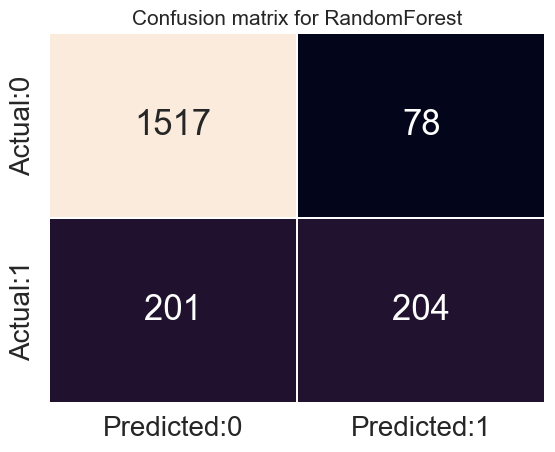

In [302]:
#Plotting confusion matrix:
plot_confusion_matrix(y_test, y_preds, 'RandomForest')


#### Creating an ANN model

##### Model Architecture

In [303]:
import tensorflow

In [304]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout

In [305]:
model = Sequential([
    Flatten(input_shape = (x_train.shape[1],)),
    Dense(64, activation = 'relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation = 'tanh'),
    Dense(16, activation = 'relu'),
    Dense(4, activation = 'sigmoid'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train,y_train, epochs = 50, batch_size = 32, verbose=1)

Epoch 1/50
250/250 [==============================] - 3s 4ms/step - loss: 0.5316 - accuracy: 0.7879
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5025 - accuracy: 0.7960
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5028 - accuracy: 0.7960
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5023 - accuracy: 0.7960
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5018 - accuracy: 0.7960
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5003 - accuracy: 0.7960
Epoch 7/50
250/250 [==============================] - 1s 4ms/step - loss: 0.5007 - accuracy: 0.7960
Epoch 8/50
250/250 [==============================] - 1s 4ms/step - loss: 0.5000 - accuracy: 0.7960
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5000 - accuracy: 0.7960
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5005 - accuracy: 0.7960

In [306]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.7975


[0.49915820360183716, 0.7975000143051147]

In [307]:
y_preds = model.predict(x_test)
y_preds

63/63 [==============================] - 0s 2ms/step


array([[0.21025062],
       [0.21025062],
       [0.23017846],
       ...,
       [0.21025062],
       [0.23067765],
       [0.21025062]], dtype=float32)

In [311]:
y_preds[20:30]

array([[0.23067765],
       [0.1706293 ],
       [0.1706293 ],
       [0.23017846],
       [0.1706293 ],
       [0.23130825],
       [0.23017846],
       [0.21025062],
       [0.1706293 ],
       [0.21025062]], dtype=float32)

##### The randomforest classifier model is the best performing model and I will try and perform hyperparameter tuning to try and improve the model performance

In [316]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

#Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')


# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8616249999999999
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.74      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000



In [317]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [318]:
confusion_matrix(y_test,y_pred)

array([[1523,   72],
       [ 199,  206]], dtype=int64)

##### The model performs well when it is predicting that a customer will not churn

In [326]:
model = RandomForestClassifier(bootstrap= False,
                               max_depth= 10,
                               min_samples_leaf= 4,
                               min_samples_split= 2,
                               n_estimators= 100)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4)

In [327]:
model.score(x_test,y_test)

0.8645

In [328]:
pickle.dump(model,open('model.pkl','wb'))

In [329]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,salary_per_age,salary_per_products,credit_per_age,products_per_age,credit_per_product,Balance_per_age,balance_and_age,salary_and_age,credit_and_age,salary_and_products
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,...,2413.068571,101348.880,14.738095,0.023810,619.000000,0.000000,0.00,4256652.96,25998,101348.88
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,...,2744.940976,112542.580,14.829268,0.024390,608.000000,2044.094146,3436122.26,4614245.78,24928,112542.58
2,Onio,502,France,Female,42,8,159660.80,3,1,0,...,2712.656429,37977.190,11.952381,0.071429,167.333333,3801.447619,6705753.60,4785125.94,21084,341794.71
3,Boni,699,France,Female,39,1,0.00,2,0,0,...,2405.811026,46913.315,17.923077,0.051282,349.500000,0.000000,0.00,3659238.57,27261,187653.26
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,...,1839.165116,79084.100,19.767442,0.023256,850.000000,2918.856279,5396965.26,3400616.30,36550,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,...,2468.477949,48135.320,19.769231,0.051282,385.500000,0.000000,0.00,3754554.96,30069,192541.28
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,...,2905.707714,101699.770,14.742857,0.028571,516.000000,1639.131714,2007936.35,3559491.95,18060,101699.77
9997,Liu,709,France,Female,36,7,0.00,1,0,1,...,1169.043889,42085.580,19.694444,0.027778,709.000000,0.000000,0.00,1515080.88,25524,42085.58
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,...,2211.631429,46444.260,18.380952,0.047619,386.000000,1787.507381,3153163.02,3901317.84,32424,185777.04


In [330]:
df.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [331]:
df.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [332]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'salary_per_credit', 'salary_per_age',
       'salary_per_products', 'credit_per_age', 'products_per_age',
       'credit_per_product', 'Balance_per_age', 'balance_and_age',
       'salary_and_age', 'credit_and_age', 'salary_and_products'],
      dtype='object')

In [337]:
df.EstimatedSalary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [338]:
import streamlit as st


In [339]:
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'salary_per_credit',
       'salary_per_age', 'salary_per_products', 'credit_per_age',
       'products_per_age', 'credit_per_product', 'Balance_per_age',
       'balance_and_age', 'salary_and_age', 'credit_and_age',
       'salary_and_products', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')